In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.data import *

In [5]:
key = 0
path = f'./data/curated/'
songs = get_dfs_from_midi(path, min_notes=30, min_gap=0.)
dfs = [item[0] for item in songs]

In [6]:
gap_dur_dpitch_dfs = gap_duration_deltapitch_transform(dfs)

In [13]:
dataset = GapDurationDeltaPitchDataset(gap_dur_dpitch_dfs, 30, stride=800)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
len(dataset), len(dataloader)

(61, 2)

In [15]:
for x in dataloader:
    x, indices = x
    y = batch_rectilinear_with_gap_transform(x)
    print(y.shape, indices)
    break

torch.Size([32, 60, 2]) tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=torch.int16)


In [16]:
gap_dur_dpitch_dfs[0]['Duration'].values

array([0.1875, 0.5625, 0.5625, 1.125 , 0.1875, 0.1875, 0.1875, 0.1875,
       0.1875, 0.1875, 0.5625, 0.5625, 0.1875, 0.1875, 0.1875, 0.1875,
       0.1875, 0.1875, 0.1875, 0.1875, 0.5625, 0.375 , 0.1875, 0.1875,
       0.1875, 0.1875, 0.375 , 0.1875, 0.75  , 0.375 , 0.5625, 0.5625,
       0.5625, 0.1875, 0.375 , 0.375 , 0.1875, 0.1875, 0.1875, 0.375 ,
       0.1875, 0.375 , 0.1875, 0.1875, 0.1875, 0.1875, 0.375 , 0.1875,
       0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.1875, 0.5625, 0.375 ,
       0.1875, 0.1875, 0.1875, 0.375 , 0.1875, 0.1875, 0.1875])

In [17]:
dfs[0]['End'].values

array([ 1.5   ,  2.0625,  2.625 ,  3.75  ,  4.6875,  4.875 ,  5.0625,
        5.25  ,  5.4375,  5.625 ,  6.1875,  6.75  ,  7.5   ,  7.6875,
        7.875 ,  8.0625,  8.25  ,  8.4375,  8.625 ,  8.8125,  9.375 ,
        9.75  , 10.5   , 10.6875, 10.875 , 11.0625, 11.4375, 11.625 ,
       12.375 , 12.75  , 14.0625, 14.625 , 15.1875, 15.375 , 15.75  ,
       16.125 , 16.6875, 16.875 , 17.0625, 17.4375, 17.625 , 18.    ,
       18.1875, 18.375 , 18.5625, 18.75  , 19.125 , 19.6875, 19.875 ,
       20.0625, 20.25  , 20.4375, 20.625 , 20.8125, 21.375 , 21.75  ,
       22.6875, 22.875 , 23.0625, 23.4375, 23.625 , 23.8125, 24.    ])

In [18]:
end = gap_dur_dpitch_dfs[0]['Duration'].cumsum().values + gap_dur_dpitch_dfs[0]['Gap'].cumsum().values
end

array([ 0.1875,  0.75  ,  1.3125,  2.4375,  3.375 ,  3.5625,  3.75  ,
        3.9375,  4.125 ,  4.3125,  4.875 ,  5.4375,  6.1875,  6.375 ,
        6.5625,  6.75  ,  6.9375,  7.125 ,  7.3125,  7.5   ,  8.0625,
        8.4375,  9.1875,  9.375 ,  9.5625,  9.75  , 10.125 , 10.3125,
       11.0625, 11.4375, 12.75  , 13.3125, 13.875 , 14.0625, 14.4375,
       14.8125, 15.375 , 15.5625, 15.75  , 16.125 , 16.3125, 16.6875,
       16.875 , 17.0625, 17.25  , 17.4375, 17.8125, 18.375 , 18.5625,
       18.75  , 18.9375, 19.125 , 19.3125, 19.5   , 20.0625, 20.4375,
       21.375 , 21.5625, 21.75  , 22.125 , 22.3125, 22.5   , 22.6875])

In [19]:
dfs[0]['End'].values - end

array([1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125])

In [20]:
dfs[0]['Start'].values

array([ 1.3125,  1.5   ,  2.0625,  2.625 ,  4.5   ,  4.6875,  4.875 ,
        5.0625,  5.25  ,  5.4375,  5.625 ,  6.1875,  7.3125,  7.5   ,
        7.6875,  7.875 ,  8.0625,  8.25  ,  8.4375,  8.625 ,  8.8125,
        9.375 , 10.3125, 10.5   , 10.6875, 10.875 , 11.0625, 11.4375,
       11.625 , 12.375 , 13.5   , 14.0625, 14.625 , 15.1875, 15.375 ,
       15.75  , 16.5   , 16.6875, 16.875 , 17.0625, 17.4375, 17.625 ,
       18.    , 18.1875, 18.375 , 18.5625, 18.75  , 19.5   , 19.6875,
       19.875 , 20.0625, 20.25  , 20.4375, 20.625 , 20.8125, 21.375 ,
       22.5   , 22.6875, 22.875 , 23.0625, 23.4375, 23.625 , 23.8125])

In [21]:
start = np.zeros_like(end)
start[1:] = gap_dur_dpitch_dfs[0]['Duration'].cumsum().values[:-1]
start = start + gap_dur_dpitch_dfs[0]['Gap'].cumsum().values
start

array([ 0.    ,  0.1875,  0.75  ,  1.3125,  3.1875,  3.375 ,  3.5625,
        3.75  ,  3.9375,  4.125 ,  4.3125,  4.875 ,  6.    ,  6.1875,
        6.375 ,  6.5625,  6.75  ,  6.9375,  7.125 ,  7.3125,  7.5   ,
        8.0625,  9.    ,  9.1875,  9.375 ,  9.5625,  9.75  , 10.125 ,
       10.3125, 11.0625, 12.1875, 12.75  , 13.3125, 13.875 , 14.0625,
       14.4375, 15.1875, 15.375 , 15.5625, 15.75  , 16.125 , 16.3125,
       16.6875, 16.875 , 17.0625, 17.25  , 17.4375, 18.1875, 18.375 ,
       18.5625, 18.75  , 18.9375, 19.125 , 19.3125, 19.5   , 20.0625,
       21.1875, 21.375 , 21.5625, 21.75  , 22.125 , 22.3125, 22.5   ])

In [22]:
dfs[0]['Start'].values - start

array([1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125,
       1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125, 1.3125])

In [ ]:
plt.plot(x[0,:,0], x[0,:,1])

In [28]:
a = torch.zeros(2,4)
b = torch.ones(2,4)
torch.stack((a,b), dim=2).view(2,8)

tensor([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 0., 1.]])

In [29]:
a = torch.arange(12).reshape(3,4)
b = torch.arange(12,24).reshape(3,4)
torch.stack((a,b), dim=2).view(3,8)

tensor([[ 0, 12,  1, 13,  2, 14,  3, 15],
        [ 4, 16,  5, 17,  6, 18,  7, 19],
        [ 8, 20,  9, 21, 10, 22, 11, 23]])

In [30]:
def batch_rectilinear_with_gap_transform(data: torch.Tensor):
    '''
    Transform data to rectilinear format
    Data is of shape (batch_size, seq_len, 3) where the last dimension is (gap, duration, note) format
    '''
    assert data.ndim == 3, 'data must be of shape (batch_size, seq_len, 3)'
    assert data.shape[2] == 3, 'data must be of shape (batch_size, seq_len, 3)'
    batch_size = data.shape[0]
    seq_len = data.shape[1]
    gap_cumsum = data[:,:,0].cumsum(dim=1) # shape (batch_size, seq_len)
    dur_cumsum = data[:,:,1].cumsum(dim=1) # shape (batch_size, seq_len)
    starts = torch.zeros_like(dur_cumsum) # shape (batch_size, seq_len)
    starts[:,1:] += dur_cumsum[:,:-1]
    starts += gap_cumsum
    ends = dur_cumsum + gap_cumsum
    t = torch.stack([starts, ends], dim=2).view(batch_size, seq_len*2).unsqueeze(-1) # shape (batch_size, seq_len*2, 1)
    pitch = data[:,:,-1:].cumsum(dim=1) # shape (batch_size, seq_len, 1
    tensor = torch.cat([t, torch.repeat_interleave(pitch, 2, dim=1)], dim=-1)
    return tensor

In [31]:
temp_df = dfs[0].copy()
temp_df['Pitch'] -= 60
temp_df[:30]

,Start,End,Pitch,Velocity,Instrument
0,1.3125,1.5000,3,80,melody
1,1.5000,2.0625,3,80,melody
2,2.0625,2.6250,5,80,melody
3,2.6250,3.7500,7,80,melody
4,4.5000,4.6875,7,80,melody
5,4.6875,4.8750,7,80,melody
6,4.8750,5.0625,7,80,melody
7,5.0625,5.2500,7,80,melody
8,5.2500,5.4375,5,80,melody
9,5.4375,5.6250,5,80,melody


In [32]:
transformed = batch_rectilinear_with_gap_transform(x)
transformed[0]

tensor([[ 0.0000,  0.0000],
        [ 0.1875,  0.0000],
        [ 0.1875,  0.0000],
        [ 0.7500,  0.0000],
        [ 0.7500,  2.0000],
        [ 1.3125,  2.0000],
        [ 1.3125,  4.0000],
        [ 2.4375,  4.0000],
        [ 3.1875,  4.0000],
        [ 3.3750,  4.0000],
        [ 3.3750,  4.0000],
        [ 3.5625,  4.0000],
        [ 3.5625,  4.0000],
        [ 3.7500,  4.0000],
        [ 3.7500,  4.0000],
        [ 3.9375,  4.0000],
        [ 3.9375,  2.0000],
        [ 4.1250,  2.0000],
        [ 4.1250,  2.0000],
        [ 4.3125,  2.0000],
        [ 4.3125,  2.0000],
        [ 4.8750,  2.0000],
        [ 4.8750,  4.0000],
        [ 5.4375,  4.0000],
        [ 6.0000, -3.0000],
        [ 6.1875, -3.0000],
        [ 6.1875,  2.0000],
        [ 6.3750,  2.0000],
        [ 6.3750,  2.0000],
        [ 6.5625,  2.0000],
        [ 6.5625,  2.0000],
        [ 6.7500,  2.0000],
        [ 6.7500,  2.0000],
        [ 6.9375,  2.0000],
        [ 6.9375,  0.0000],
        [ 7.1250,  0

('adele', 'rolling-in-the-deep', 'chorus_symbol_key.mid', [(0, 0.0)], [(4, 4, 0.0)], array([ 0.      ,  0.576923,  1.153846,  1.730769,  2.307692,  2.884615,
        3.461538,  4.038461,  4.615384,  5.192307,  5.76923 ,  6.346153,
        6.923076,  7.499999,  8.076922,  8.653845,  9.230768,  9.807691,
       10.384614, 10.961537, 11.53846 , 12.115383, 12.692306, 13.269229,
       13.846152, 14.423075, 14.999998, 15.576921, 16.153844, 16.730767,
       17.30769 , 17.884613, 18.461536, 19.038459, 19.615382]))


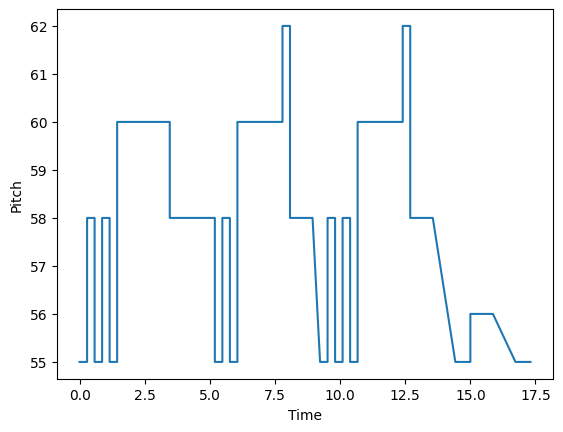

In [56]:
idx = 6
print(songs[idx][1:])
plt.plot(transformed[idx,:,0], transformed[idx,:,1]+55)
plt.xlabel('Time')
plt.ylabel('Pitch');

In [57]:
midi_data = df_to_midi(songs[idx][0])
audio_data = midi_data.fluidsynth()
ipd.Audio(audio_data, rate=44100)

In [58]:
songs[idx][0]

,Start,End,Pitch,Velocity,Instrument
0,0.865385,1.153846,55,80,melody
1,1.153846,1.442307,58,80,melody
2,1.442307,1.730769,55,80,melody
3,1.730769,2.019230,58,80,melody
4,2.019230,2.307692,55,80,melody
5,2.307692,4.038461,60,80,melody
6,4.038461,4.326923,60,80,melody
7,4.326923,5.192307,58,80,melody
8,5.769230,6.057691,58,80,melody
9,6.057691,6.346153,55,80,melody
